In [41]:
import cv2
import matplotlib.image as mpimg
from tensorflow.keras import models, layers
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import BatchNormalization, Activation, Flatten
from tensorflow.keras.optimizers import Adam,RMSprop,SGD
import tensorflow.keras.backend as k
import os
import tensorflow.keras as keras
import tensorflow as tf
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, Conv3D,UpSampling2D,ReLU,Dropout
import json
import matplotlib.image as mpimg
from tqdm.notebook import tqdm
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Layer

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
model = load_model('/content/gdrive/MyDrive/project deepmag/saved model 60k/')

In [4]:
def generate_frames(path):
  '''
  takes in a file path of video and generates frames from it and returns a list of frames
  '''
  images =[]
  cap = cv2.VideoCapture(path)
  currentFrame = 0
  # ret = True
  while(True):
    ret, frame = cap.read()
    if ret==False:
      break
    frame =np.array(frame,dtype=np.uint8)
    frame = cv2.resize(frame,(384,384))
    im_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    images.append(im_rgb)
  cap.release()
  cv2.destroyAllWindows()
  return images


In [42]:
path ='/content/gdrive/MyDrive/video.mp4'
frames = generate_frames(path)

In [43]:
len(frames)

540

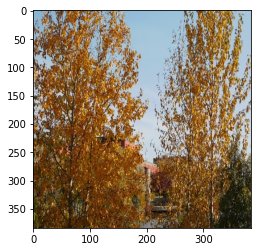

In [44]:
plt.imshow(frames[0])

In [45]:
def magnified_frames(frames,mf):
  '''
  takes in a list of frames and amplify the motion using the model and returns a list of magnified images
  '''
  mag_frames=[]
  mf = tf.Variable([[[mf]]])
  mf = tf.expand_dims(mf,axis=0)
  for i in range(len(frames)-1):
    im1= tf.expand_dims(frames[i],axis=0)
    im2 = tf.expand_dims(frames[i+1],axis=0)
    out = model.predict([im1,im2,mf])
    mag_frames.append(out)
  return mag_frames


In [46]:
amp_images = magnified_frames(frames,5)

In [47]:
out = cv2.VideoWriter('/content/gdrive/MyDrive/video_output.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 30, (384,384))
 
for i in range(len(amp_images)):
    image = tf.squeeze(amp_images[i])
    image = np.array(image,dtype=np.uint8)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    out.write(image)
out.release()

In [48]:
out = cv2.VideoWriter('/content/gdrive/MyDrive/video_original.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 30, (384,384))
 
for i in range(len(frames)):
    image = frames[i]
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    out.write(image)
out.release()